In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load Data
def load_data():
    """Load all input files."""
    customers = pd.read_csv(r"C:\Users\HP\Downloads\Customers.csv")
    products = pd.read_csv(r"C:\Users\HP\Downloads\Products.csv")
    transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")
    return customers, products, transactions

customers, products, transactions = load_data()

# Preview Data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

Merged Data Overview:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB
None

Summary Statistics:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  10

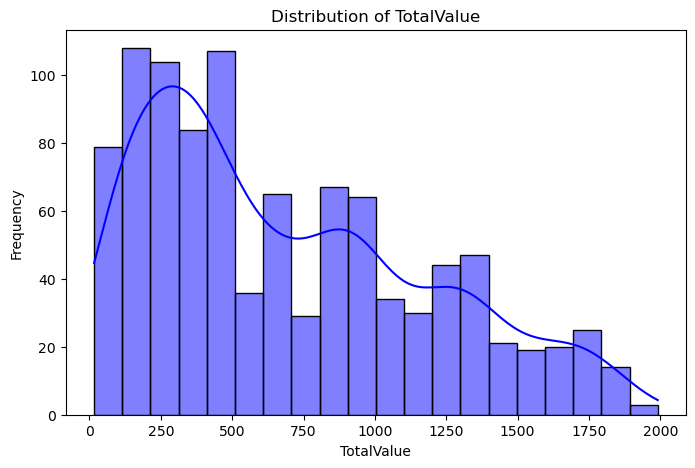

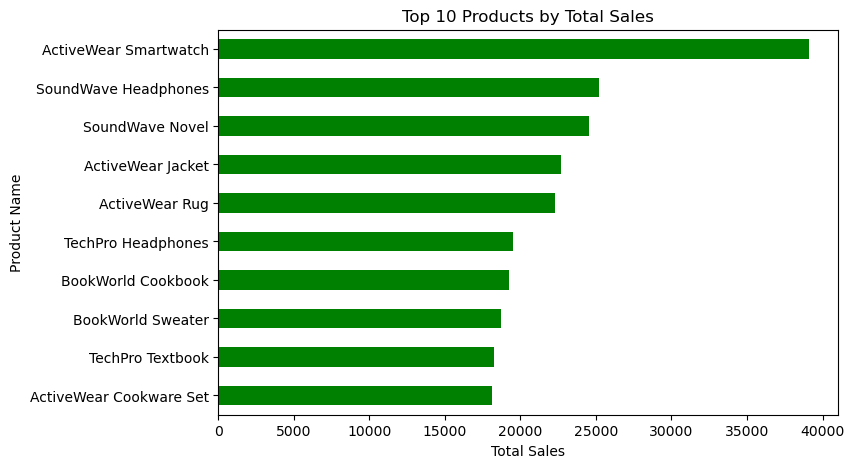

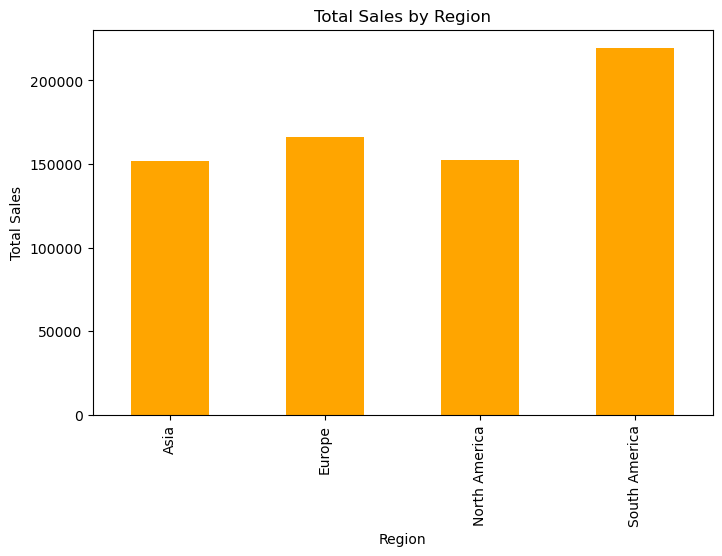

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets
customers = pd.read_csv(r"C:\Users\HP\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\HP\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")

# Merge Data
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Data Overview
print("Merged Data Overview:")
print(merged_data.info())
print("\nSummary Statistics:\n", merged_data.describe())

# Handling Missing Values
print("\nMissing Values:\n", merged_data.isnull().sum())

# Visualization 1: Distribution of TotalValue
plt.figure(figsize=(8, 5))
sns.histplot(merged_data["TotalValue"], bins=20, kde=True, color="blue")
plt.title("Distribution of TotalValue")
plt.xlabel("TotalValue")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Top 10 Products by Total Sales
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind="barh", color="green")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()
plt.show()

# Visualization 3: Customer Spending by Region
region_sales = merged_data.groupby("Region")["TotalValue"].sum()
plt.figure(figsize=(8, 5))
region_sales.plot(kind="bar", color="orange")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


Customer Distribution by Region:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


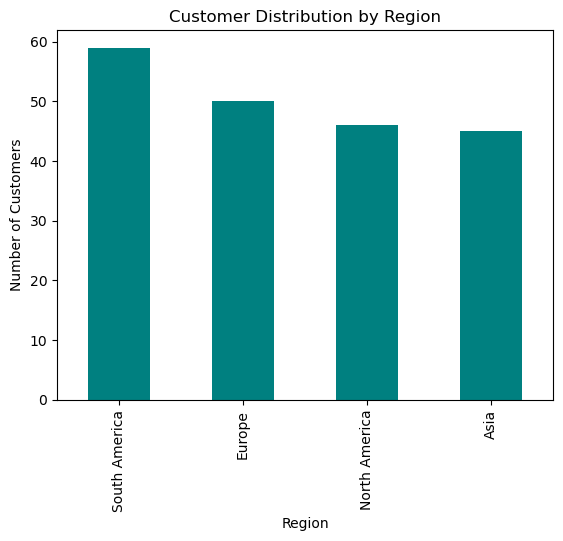

Total Sales by Product Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


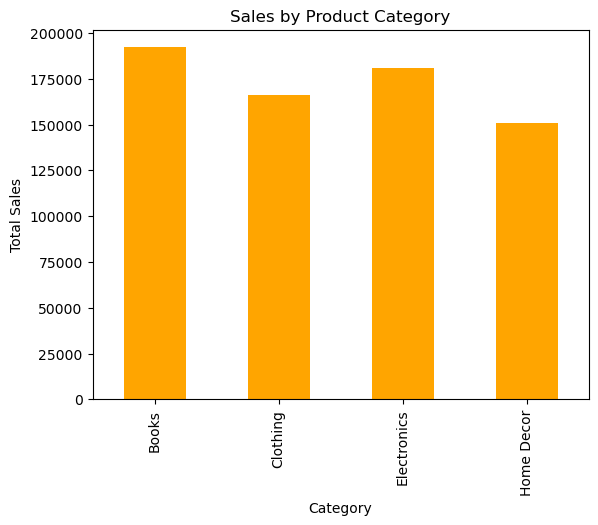

Monthly Sales Trends:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


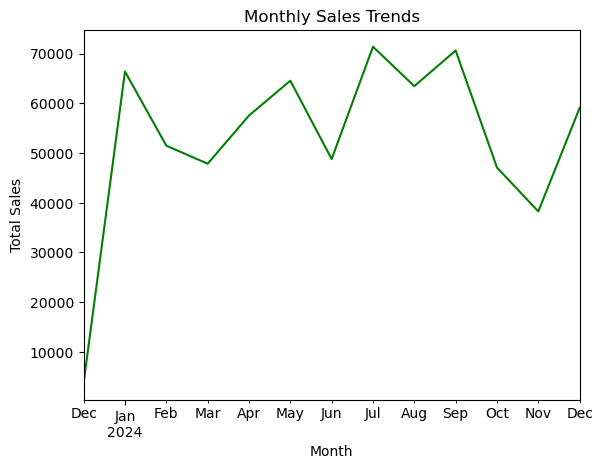

In [13]:
# EDA and Insights
def perform_eda(customers, products, transactions):
    # 1. Customer Distribution by Region
    region_counts = customers['Region'].value_counts()
    print(f"Customer Distribution by Region:\n{region_counts}")

    # Plot Region Distribution
    region_counts.plot(kind='bar', title='Customer Distribution by Region', color='teal')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.savefig('region_distribution.png')
    plt.show()

    # 2. Sales by Product Category
    transactions = transactions.merge(products, on='ProductID')
    category_sales = transactions.groupby('Category')['TotalValue'].sum()
    print(f"Total Sales by Product Category:\n{category_sales}")

    # Plot Sales by Category
    category_sales.plot(kind='bar', title='Sales by Product Category', color='orange')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.savefig('category_sales.png')
    plt.show()

    # 3. Monthly Sales Trends
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
    monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
    print(f"Monthly Sales Trends:\n{monthly_sales}")

    # Plot Monthly Sales Trends
    monthly_sales.plot(title='Monthly Sales Trends', color='green')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.savefig('monthly_sales_trends.png')
    plt.show()

perform_eda(customers, products, transactions)
